# Introduction

# Data Import

In [11]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [28]:
# load mortality data
Cirrhosis_MOR0 = pd.read_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Cirrhosis/data/cir_mortality.csv')
Cirrhosis_MOR0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86432 entries, 0 to 86431
Data columns (total 31 columns):
VISIT_ID2                   86432 non-null int64
MORTALITY                   86432 non-null int64
AKI_CATEGORY2               86432 non-null object
ARDS                        86432 non-null object
ABX                         86432 non-null int64
BETA_BLOCKER                86432 non-null int64
CRYST_RES_VOL_CATEGORY      86432 non-null object
DIURETIC                    86432 non-null int64
GIDX_BLEEDING               86432 non-null int64
GLYCEMIA                    86432 non-null object
HE                          86432 non-null int64
HRS                         86432 non-null int64
LVP                         86432 non-null int64
SBP                         86432 non-null int64
SEPSIS                      86432 non-null int64
STEROIDS                    86432 non-null int64
TIME_TO_ALB_CATEGORY_LOS    86432 non-null object
VENTILATION                 86432 non-null int64
VASO

In [29]:
# load LOS data
Cirrhosis_LOS0 = pd.read_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Cirrhosis/data/cir_hospital_los.csv')
Cirrhosis_LOS0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77176 entries, 0 to 77175
Data columns (total 4 columns):
VISIT_ID2             77176 non-null int64
DISCHARGE_CATEGORY    77176 non-null object
LOS_DAYS              77176 non-null float64
LONG_LOS_DAYS         77176 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.4+ MB


In [30]:
# join dataframes on VISIT_ID2
Cirrhosis_LOS1 = pd.merge(Cirrhosis_MOR0, Cirrhosis_LOS0, on = 'VISIT_ID2')
Cirrhosis_LOS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77176 entries, 0 to 77175
Data columns (total 34 columns):
VISIT_ID2                   77176 non-null int64
MORTALITY                   77176 non-null int64
AKI_CATEGORY2               77176 non-null object
ARDS                        77176 non-null object
ABX                         77176 non-null int64
BETA_BLOCKER                77176 non-null int64
CRYST_RES_VOL_CATEGORY      77176 non-null object
DIURETIC                    77176 non-null int64
GIDX_BLEEDING               77176 non-null int64
GLYCEMIA                    77176 non-null object
HE                          77176 non-null int64
HRS                         77176 non-null int64
LVP                         77176 non-null int64
SBP                         77176 non-null int64
SEPSIS                      77176 non-null int64
STEROIDS                    77176 non-null int64
TIME_TO_ALB_CATEGORY_LOS    77176 non-null object
VENTILATION                 77176 non-null int64
VASO

In [32]:
# drop variables
Cirrhosis_LOS2 = Cirrhosis_LOS1.drop(['MORTALITY', 'LOS_DAYS'], axis = 1)
Cirrhosis_LOS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77176 entries, 0 to 77175
Data columns (total 32 columns):
VISIT_ID2                   77176 non-null int64
AKI_CATEGORY2               77176 non-null object
ARDS                        77176 non-null object
ABX                         77176 non-null int64
BETA_BLOCKER                77176 non-null int64
CRYST_RES_VOL_CATEGORY      77176 non-null object
DIURETIC                    77176 non-null int64
GIDX_BLEEDING               77176 non-null int64
GLYCEMIA                    77176 non-null object
HE                          77176 non-null int64
HRS                         77176 non-null int64
LVP                         77176 non-null int64
SBP                         77176 non-null int64
SEPSIS                      77176 non-null int64
STEROIDS                    77176 non-null int64
TIME_TO_ALB_CATEGORY_LOS    77176 non-null object
VENTILATION                 77176 non-null int64
VASOPRESSOR                 77176 non-null int64
ADMI

In [33]:
# set index
Cirrhosis_LOS2.set_index(['VISIT_ID2'], inplace = True)

# Data Cleaning

## Delete Missing Values

In [34]:
# check missing values
missing_data = Cirrhosis_LOS2.isnull().sum(axis = 0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['missing %'] = missing_data['missing values'] / Cirrhosis_LOS2.shape[0] * 100
missing_data_srt = missing_data.sort_values('missing %', ascending = False).reset_index(drop = True)
missing_data_srt[missing_data_srt['missing %'] > 0]

,variable,missing values,missing %
0,MELD_Na,2881,3.733026
1,ELIXHAUSER_INDEX,23,0.029802


In [35]:
# delete missing values
Cirrhosis_LOS3 = Cirrhosis_LOS2.dropna()
Cirrhosis_LOS3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74275 entries, 326305398 to 283396498
Data columns (total 31 columns):
AKI_CATEGORY2               74275 non-null object
ARDS                        74275 non-null object
ABX                         74275 non-null int64
BETA_BLOCKER                74275 non-null int64
CRYST_RES_VOL_CATEGORY      74275 non-null object
DIURETIC                    74275 non-null int64
GIDX_BLEEDING               74275 non-null int64
GLYCEMIA                    74275 non-null object
HE                          74275 non-null int64
HRS                         74275 non-null int64
LVP                         74275 non-null int64
SBP                         74275 non-null int64
SEPSIS                      74275 non-null int64
STEROIDS                    74275 non-null int64
TIME_TO_ALB_CATEGORY_LOS    74275 non-null object
VENTILATION                 74275 non-null int64
VASOPRESSOR                 74275 non-null int64
ADMISSION_TYPE_GROUP        74275 non-nul

## Encode Categorical Features

In [36]:
# convert feature types
Cirrhosis_LOS3['INDEX_YEAR'] = Cirrhosis_LOS3['INDEX_YEAR'].apply(str)

In [37]:
# encode categorical features
Cirrhosis_LOS4 = pd.get_dummies(Cirrhosis_LOS3)
Cirrhosis_LOS4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74275 entries, 326305398 to 283396498
Data columns (total 81 columns):
ABX                                                 74275 non-null int64
BETA_BLOCKER                                        74275 non-null int64
DIURETIC                                            74275 non-null int64
GIDX_BLEEDING                                       74275 non-null int64
HE                                                  74275 non-null int64
HRS                                                 74275 non-null int64
LVP                                                 74275 non-null int64
SBP                                                 74275 non-null int64
SEPSIS                                              74275 non-null int64
STEROIDS                                            74275 non-null int64
VENTILATION                                         74275 non-null int64
VASOPRESSOR                                         74275 non-null int64
FEM

In [39]:
# drop one level to avoid collinearity
variables_to_drop = ['AKI_CATEGORY2_NONE', 
                     'ARDS_NONE', 
                     'CRYST_RES_VOL_CATEGORY_>1250', 
                     'GLYCEMIA_NEITHER', 
                     'TIME_TO_ALB_CATEGORY_LOS_NONE', 
                     'ADMISSION_TYPE_GROUP_Emergency', 
                     'AGE_GROUP_18-29', 
                     'BED_SIZE_0-99', 
                     'CENSUS_REGION_South', 
                     'INDEX_YEAR_2016',
                     'PAYER_GROUP_Commercial', 
                     'RACE_GROUP_Caucasian', 
                     'TEACHING_FACILITY_No',
                     'DISCHARGE_CATEGORY_HOME']
Cirrhosis_LOS5 = Cirrhosis_LOS4.drop(variables_to_drop, axis = 1)
Cirrhosis_LOS5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74275 entries, 326305398 to 283396498
Data columns (total 67 columns):
ABX                                                 74275 non-null int64
BETA_BLOCKER                                        74275 non-null int64
DIURETIC                                            74275 non-null int64
GIDX_BLEEDING                                       74275 non-null int64
HE                                                  74275 non-null int64
HRS                                                 74275 non-null int64
LVP                                                 74275 non-null int64
SBP                                                 74275 non-null int64
SEPSIS                                              74275 non-null int64
STEROIDS                                            74275 non-null int64
VENTILATION                                         74275 non-null int64
VASOPRESSOR                                         74275 non-null int64
FEM

## Seperate Features and Targets

In [40]:
# create the target vector
y = Cirrhosis_LOS5.iloc[:, Cirrhosis_LOS5.columns == 'LONG_LOS_DAYS']
y['LONG_LOS_DAYS'].value_counts()

0    55984
1    18291
Name: LONG_LOS_DAYS, dtype: int64

In [41]:
y['LONG_LOS_DAYS'].value_counts(normalize = True)

0    0.753739
1    0.246261
Name: LONG_LOS_DAYS, dtype: float64

In [42]:
# create the features matrix
X = Cirrhosis_LOS5.iloc[:, Cirrhosis_LOS5.columns != 'LONG_LOS_DAYS']
X.describe().T

,count,mean,std,min,25%,50%,75%,max
ABX,74275.0,0.598492,0.490207,0.0,0.0,1.000,1.0,1.0
BETA_BLOCKER,74275.0,0.171188,0.376676,0.0,0.0,0.000,0.0,1.0
DIURETIC,74275.0,0.431316,0.495263,0.0,0.0,0.000,1.0,1.0
GIDX_BLEEDING,74275.0,0.137166,0.344025,0.0,0.0,0.000,0.0,1.0
HE,74275.0,0.180061,0.384240,0.0,0.0,0.000,0.0,1.0
HRS,74275.0,0.034574,0.182700,0.0,0.0,0.000,0.0,1.0
LVP,74275.0,0.257556,0.437291,0.0,0.0,0.000,1.0,1.0
SBP,74275.0,0.032151,0.176402,0.0,0.0,0.000,0.0,1.0
SEPSIS,74275.0,0.071262,0.257264,0.0,0.0,0.000,0.0,1.0
STEROIDS,74275.0,0.125520,0.331310,0.0,0.0,0.000,0.0,1.0


# Generalized Linear Model - Logistic Regression

In [43]:
# create a logistic regression model
X_cons = sm.add_constant(X)
glm_logit = sm.Logit(y, X_cons)

In [44]:
# fit logistic regression
glm_logit_result = glm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.384937
         Iterations 7


In [45]:
# display model summary
print(glm_logit_result.summary())

                           Logit Regression Results                           
Dep. Variable:          LONG_LOS_DAYS   No. Observations:                74275
Model:                          Logit   Df Residuals:                    74208
Method:                           MLE   Df Model:                           66
Date:                Wed, 10 Apr 2019   Pseudo R-squ.:                  0.3104
Time:                        15:52:43   Log-Likelihood:                -28591.
converged:                       True   LL-Null:                       -41460.
                                        LLR p-value:                     0.000
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.7402      0.090    -41.424      0.000      -3.917      -3.563
ABX              

# Split Data into Training and Test Sets

In [46]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345)
print('Training Features Shape:', X_train.shape)
print('Training Lable Shape:', y_train.shape)
print('Test Features Shape:', X_test.shape)
print('Test Lable Shape:', y_test.shape)

Training Features Shape: (51992, 66)
Training Lable Shape: (51992, 1)
Test Features Shape: (22283, 66)
Test Lable Shape: (22283, 1)


In [47]:
# fit standardizer to training set
standardizer = StandardScaler()
standardizer.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
# apply to both training and test sets
X_trian_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

In [49]:
# covert labels to arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Machine Learning Model - Logistic Regression

## Train Model

In [50]:
# create a base Logistic model
base_logit = LogisticRegression(class_weight = 'balanced', random_state = 12345)

In [51]:
# train the model on training data
base_logit.fit(X_trian_std , y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2',
          random_state=12345, solver='warn', tol=0.0001, verbose=0,
          warm_start=False)

## Predict Test Data

In [52]:
# predict test data
y_pred_logit = base_logit.predict(X_test_std)
y_pred_prob_logit = base_logit.predict_proba(X_test_std)

## Evaulate Performance

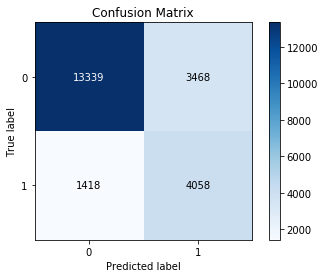

In [53]:
# plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_logit)
plt.show()

In [54]:
# extract true_positives, false_positives, true_negatives, false_negatives
cm_matrix = confusion_matrix(y_test, y_pred_logit)
tn, fp, fn, tp = cm_matrix.ravel()
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  13339
False Positives:  3468
False Negatives:  1418
True Positives:  4058


In [55]:
# accuracy
accuracy = (tn+tp)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}:".format(accuracy))

Accuracy 0.78:


In [56]:
# precision
precision = tp/(tp+fp)
print("Precision {:0.2f}:".format(precision))

Precision 0.54:


In [57]:
# recall
recall = tp /(tp+fn)
print("# Recall {:0.2f}:".format(recall))

# Recall 0.74:


In [58]:
# f1 score
f1 = (2*precision*recall)/(precision+recall)
print("# F1 Score {:0.2f}:".format(f1))

# F1 Score 0.62:


In [59]:
# print classification report
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.90      0.79      0.85     16807
           1       0.54      0.74      0.62      5476

   micro avg       0.78      0.78      0.78     22283
   macro avg       0.72      0.77      0.73     22283
weighted avg       0.81      0.78      0.79     22283



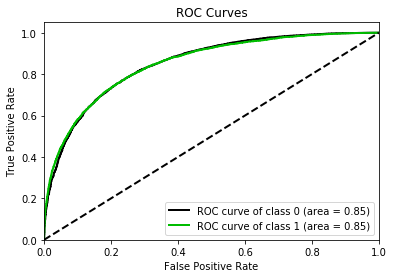

In [60]:
# plot ROC curves
skplt.metrics.plot_roc_curve(y_test, y_pred_prob_logit, curves = ('each_class'))
plt.show()

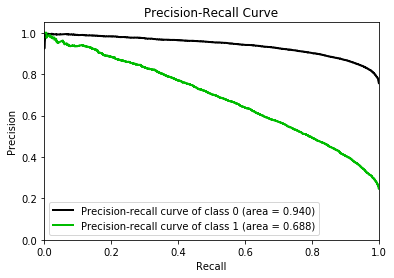

In [61]:
# plot Precision-Recall curve
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob_logit, curves = ('each_class'))
plt.show()

# Machine Learning Model - Random Forests

## Train Model

In [62]:
# create a base Random Forest model
base_rf = RandomForestClassifier(n_estimators = 1000, class_weight = 'balanced', random_state = 12345)

In [64]:
# train the model on training data
base_rf.fit(X_trian_std , y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=False,
            random_state=12345, verbose=0, warm_start=False)

## Predict Test Data

In [65]:
# predict test data
y_pred_rf = base_rf.predict(X_test_std)
y_pred_prob_rf = base_rf.predict_proba(X_test_std)

## Evaulate Performance

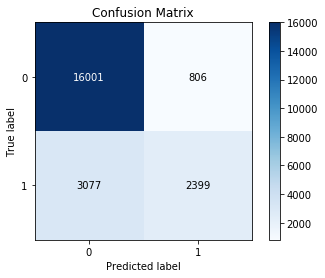

In [66]:
# plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf)
plt.show()

In [67]:
# extract true_positives, false_positives, true_negatives, false_negatives
cm_matrix = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_matrix.ravel()
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  16001
False Positives:  806
False Negatives:  3077
True Positives:  2399


In [68]:
# accuracy
accuracy = (tn+tp)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}:".format(accuracy))

Accuracy 0.83:


In [69]:
# precision
precision = tp/(tp+fp)
print("Precision {:0.2f}:".format(precision))

Precision 0.75:


In [70]:
# recall
recall = tp /(tp+fn)
print("# Recall {:0.2f}:".format(recall))

# Recall 0.44:


In [71]:
# f1 score
f1 = (2*precision*recall)/(precision+recall)
print("# F1 Score {:0.2f}:".format(f1))

# F1 Score 0.55:


In [72]:
# print classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16807
           1       0.75      0.44      0.55      5476

   micro avg       0.83      0.83      0.83     22283
   macro avg       0.79      0.70      0.72     22283
weighted avg       0.82      0.83      0.81     22283



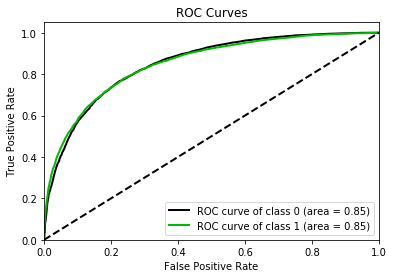

In [73]:
# plot ROC curves
skplt.metrics.plot_roc_curve(y_test, y_pred_prob_rf, curves = ('each_class'))
plt.show()

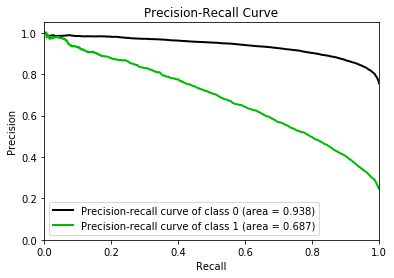

In [74]:
# plot Precision-Recall curve
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob_rf, curves = ('each_class'))
plt.show()

## Examine Variable Importances

In [75]:
# create a dataframe of feature importances
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = base_rf.feature_importances_
feature_importances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
feature       66 non-null object
importance    66 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [76]:
# sort dataframe by feature importances
feature_importances_srt = feature_importances.sort_values(by='importance', ascending = False).reset_index()
feature_importances_srt

,index,feature,importance
0,14,ELIXHAUSER_INDEX,0.083216
1,15,MELD_Na,0.079239
2,11,VASOPRESSOR,0.047602
3,21,"CRYST_RES_VOL_CATEGORY_(0, 500]",0.044018
4,0,ABX,0.039674
5,16,AKI_CATEGORY2_MILD,0.037221
6,28,TIME_TO_ALB_CATEGORY_LOS_>24,0.036215
7,10,VENTILATION,0.027702
8,65,DISCHARGE_CATEGORY_SNF,0.022889
9,2,DIURETIC,0.022581


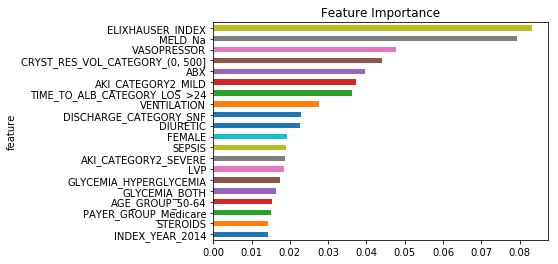

In [77]:
# plot Top 20 feature importances
feature_importances_top20 = feature_importances_srt.iloc[0:20, :]
feature_importances_top20.sort_values(by='importance', ascending = True, inplace = True)
feature_importances_top20.plot(x = 'feature', y = 'importance', kind = 'barh', legend = False)
plt.title('Feature Importance')
plt.show()

# Refine Model using Top Features

## Select Top Important Features

In [79]:
# select Top 10 important features
top10_features = list(feature_importances_srt.iloc[0:10, 1])
top10_features

['ELIXHAUSER_INDEX',
 'MELD_Na',
 'VASOPRESSOR',
 'CRYST_RES_VOL_CATEGORY_(0, 500]',
 'ABX',
 'AKI_CATEGORY2_MILD',
 'TIME_TO_ALB_CATEGORY_LOS_>24',
 'VENTILATION',
 'DISCHARGE_CATEGORY_SNF',
 'DIURETIC']

In [80]:
# subset important features
X_train_top = X_train[top10_features]
X_test_top = X_test[top10_features]

In [81]:
# fit standardizer to training set
standardizer_top = StandardScaler()
standardizer_top.fit(X_train_top)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [82]:
# apply to both training and test sets
X_train_top_std = standardizer_top.transform(X_train_top)
X_test_top_std = standardizer_top.transform(X_test_top)

## Machine Learning Model - Refined Logistic Regression

In [83]:
# create a refined Logistic model
refined_logit = LogisticRegression(class_weight = 'balanced', random_state = 12345)

In [84]:
# train the model on training data
refined_logit.fit(X_train_top_std , y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2',
          random_state=12345, solver='warn', tol=0.0001, verbose=0,
          warm_start=False)

In [85]:
# predict test data
y_pred_top_logit = refined_logit.predict(X_test_top_std)
y_pred_prob_top_logit = refined_logit.predict_proba(X_test_top_std)

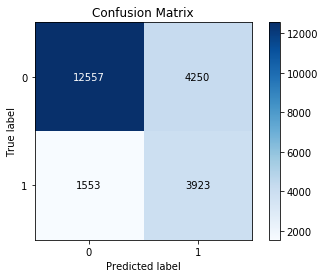

In [86]:
# plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_top_logit)
plt.show()

In [87]:
# print classification report
print(classification_report(y_test, y_pred_top_logit))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81     16807
           1       0.48      0.72      0.57      5476

   micro avg       0.74      0.74      0.74     22283
   macro avg       0.68      0.73      0.69     22283
weighted avg       0.79      0.74      0.75     22283



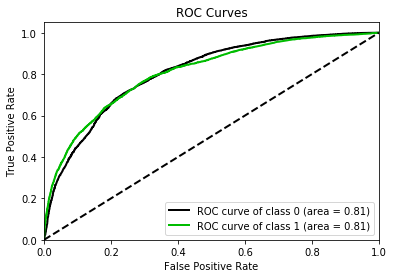

In [88]:
# plot ROC curves
skplt.metrics.plot_roc_curve(y_test, y_pred_prob_top_logit, curves = ('each_class'))
plt.show()

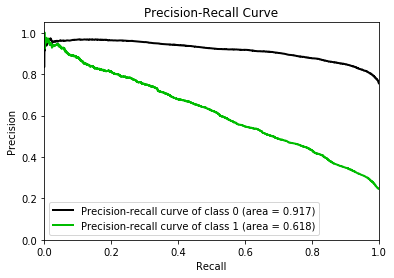

In [89]:
# plot Precision-Recall curve
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob_top_logit, curves = ('each_class'))
plt.show()

## Machine Learning Model - Refined Random Forests

In [90]:
# create a refined Random Forest model
refined_rf = RandomForestClassifier(n_estimators = 1000, class_weight = 'balanced', random_state = 12345)

In [91]:
# train the model on training data
refined_rf.fit(X_train_top_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=False,
            random_state=12345, verbose=0, warm_start=False)

In [92]:
# predict test data
y_pred_top_rf = refined_rf.predict(X_test_top_std)
y_pred_prob_top_rf = refined_rf.predict_proba(X_test_top_std)

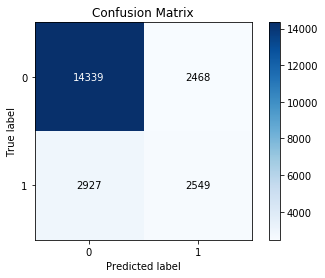

In [93]:
# plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_top_rf)
plt.show()

In [94]:
# print classification report
print(classification_report(y_test, y_pred_top_rf))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     16807
           1       0.51      0.47      0.49      5476

   micro avg       0.76      0.76      0.76     22283
   macro avg       0.67      0.66      0.66     22283
weighted avg       0.75      0.76      0.75     22283



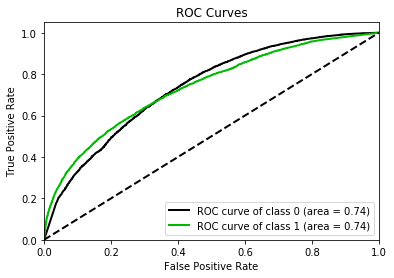

In [95]:
# plot ROC curves
skplt.metrics.plot_roc_curve(y_test, y_pred_prob_top_rf, curves = ('each_class'))
plt.show()

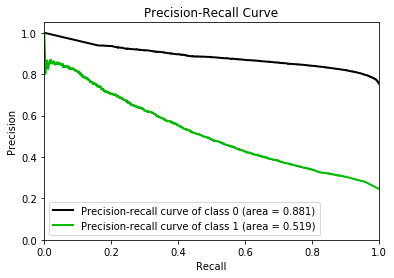

In [96]:
# plot Precision-Recall curve
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob_top_rf, curves = ('each_class'))
plt.show()

# Conclusion